# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import os
from random import choice
import gc

import warnings; warnings.filterwarnings('ignore')

from cycler import cycler
from colorama import Style, Fore
from IPython.display import display

sys.path.append('..')

from config import CFG
from src.visuals.dataframe_styling import magnify, stylize_describe, stylize_simple
from src.visuals.plotting import plot_time_series, plot_count

CFG = CFG()

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', CFG.NCOLS)
pd.set_option('display.max_rows', CFG.NROWS)

# Visuals Configurations

In [2]:
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

palette = ['#3c3744', '#048BA8', '#EE6352', '#E1BB80', '#78BC61']
grey_palette = ['#8e8e93', '#636366', '#48484a', '#3a3a3c', '#2c2c2e', '#1c1c27']
bg_color = '#F6F5F5'
white_color = '#d1d1d6'

custom_params = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.left': False,
    'grid.alpha':0.2,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'ytick.labelsize': 'medium',
    'xtick.labelsize': 'medium',
    'legend.fontsize': 'large',
    'lines.linewidth': 1,
    'axes.prop_cycle': cycler('color',palette),
    'figure.facecolor': bg_color,
    'figure.edgecolor': bg_color,
    'axes.facecolor': bg_color,
    'text.color':grey_palette[1],
    'axes.labelcolor':grey_palette[1],
    'axes.edgecolor':grey_palette[1],
    'xtick.color':grey_palette[1],
    'ytick.color':grey_palette[1],
    'figure.dpi':150,
}
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params)

display(sns.color_palette(palette))
display(sns.color_palette(grey_palette))
display(sns.color_palette([bg_color, white_color]))

[(0.23529411764705882, 0.21568627450980393, 0.26666666666666666),
 (0.01568627450980392, 0.5450980392156862, 0.6588235294117647),
 (0.9333333333333333, 0.38823529411764707, 0.3215686274509804),
 (0.8823529411764706, 0.7333333333333333, 0.5019607843137255),
 (0.47058823529411764, 0.7372549019607844, 0.3803921568627451)]

[(0.5568627450980392, 0.5568627450980392, 0.5764705882352941),
 (0.38823529411764707, 0.38823529411764707, 0.4),
 (0.2823529411764706, 0.2823529411764706, 0.2901960784313726),
 (0.22745098039215686, 0.22745098039215686, 0.23529411764705882),
 (0.17254901960784313, 0.17254901960784313, 0.1803921568627451),
 (0.10980392156862745, 0.10980392156862745, 0.15294117647058825)]

[(0.9647058823529412, 0.9607843137254902, 0.9607843137254902),
 (0.8196078431372549, 0.8196078431372549, 0.8392156862745098)]

# Data Exploration

- tdcsfog:
  - "comprising data series collected in the lab, as subjects completed a FOG-provoking protocol"
- defog:
  - "comprising data series collected in the subject's home, as subjects completed a FOG-provoking protocol"
- notype
  - "Series in the notype folder are from the defog dataset but lack event-type annotations"
- unlabeled
  - "Folder containing the unannotated data series from the daily dataset, one series per subject. Forty-five of the subjects also have series in the defog dataset, some in the training split and some in the test split. Accelerometer data has units of g."

"Trials from the tdcsfog and defog datasets were videotaped and annotated by expert reviewers documented the freezing of gait episodes. That is, the start, end and type of each episode were marked by the experts. Series in the daily dataset are unannotated. You will be detecting FOG episodes for the tdcsfog and defog series. You may wish to apply unsupervised or semi-supervised methods to the series in the daily dataset to support your detection modelling."

See this page for more on these datasets as well as video examples of freezing of gait events: [additional data documentation](https://www.kaggle.com/competitions/tlvmc-parkinsons-freezing-gait-prediction/overview/additional-data-documentation)

## Train Data

In [3]:
print(
    f'\t{gld}Number of files in "train/defog"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/defog"))}{res}'
)
print(
    f'\t{gld}Number of files in "train/notype"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/notype"))}{res}'
)
print(
    f'\t{gld}Number of files in "train/tdcsfog"\t--> \t {red}{len(os.listdir(f"{CFG.TRAIN_PATH}/tdcsfog"))}{res}'
)

	Number of files in "train/defog"	--> 	 91
	Number of files in "train/notype"	--> 	 46
	Number of files in "train/tdcsfog"	--> 	 833


## Train tdcsfog

In [12]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/tdcsfog"))
train_tdcsfog_example = pd.read_csv(f"{CFG.TRAIN_PATH}/tdcsfog/{example}")

print(f"\t{gld}Shape of tdcsfog example dataframe \t --> \t {red}{train_tdcsfog_example.shape}{res}")
display(stylize_simple(train_tdcsfog_example.head(5), "train tdcsfog example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_tdcsfog_example, dataset_name='train tdcsfog example'))

	Shape of tdcsfog example dataframe 	 --> 	 (6553, 7)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.857819,-0.010971,-1.074963,0,0,0
1,1,-9.857900,-0.010227,-1.073474,0,0,0
2,2,-9.858133,-0.009520,-1.078683,0,0,0
3,3,-9.857272,-0.011789,-1.083147,0,0,0
4,4,-9.858606,-0.013996,-1.077944,0,0,0


,count,mean,std,min,25%,50%,75%,max,NaN count
Time,6553,3276.000,1891.832,0.000,1638.000,3276.000,4914.000,6552.000,0.000
AccV,6553,-8.897,0.931,-13.660,-9.528,-8.818,-8.327,-5.494,0.000
AccML,6553,0.524,1.047,-2.850,-0.237,0.349,1.370,4.612,0.000
AccAP,6553,3.558,1.993,-4.072,3.129,4.189,4.735,8.683,0.000
StartHesitation,6553,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Turn,6553,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Walking,6553,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### Time Series Plots

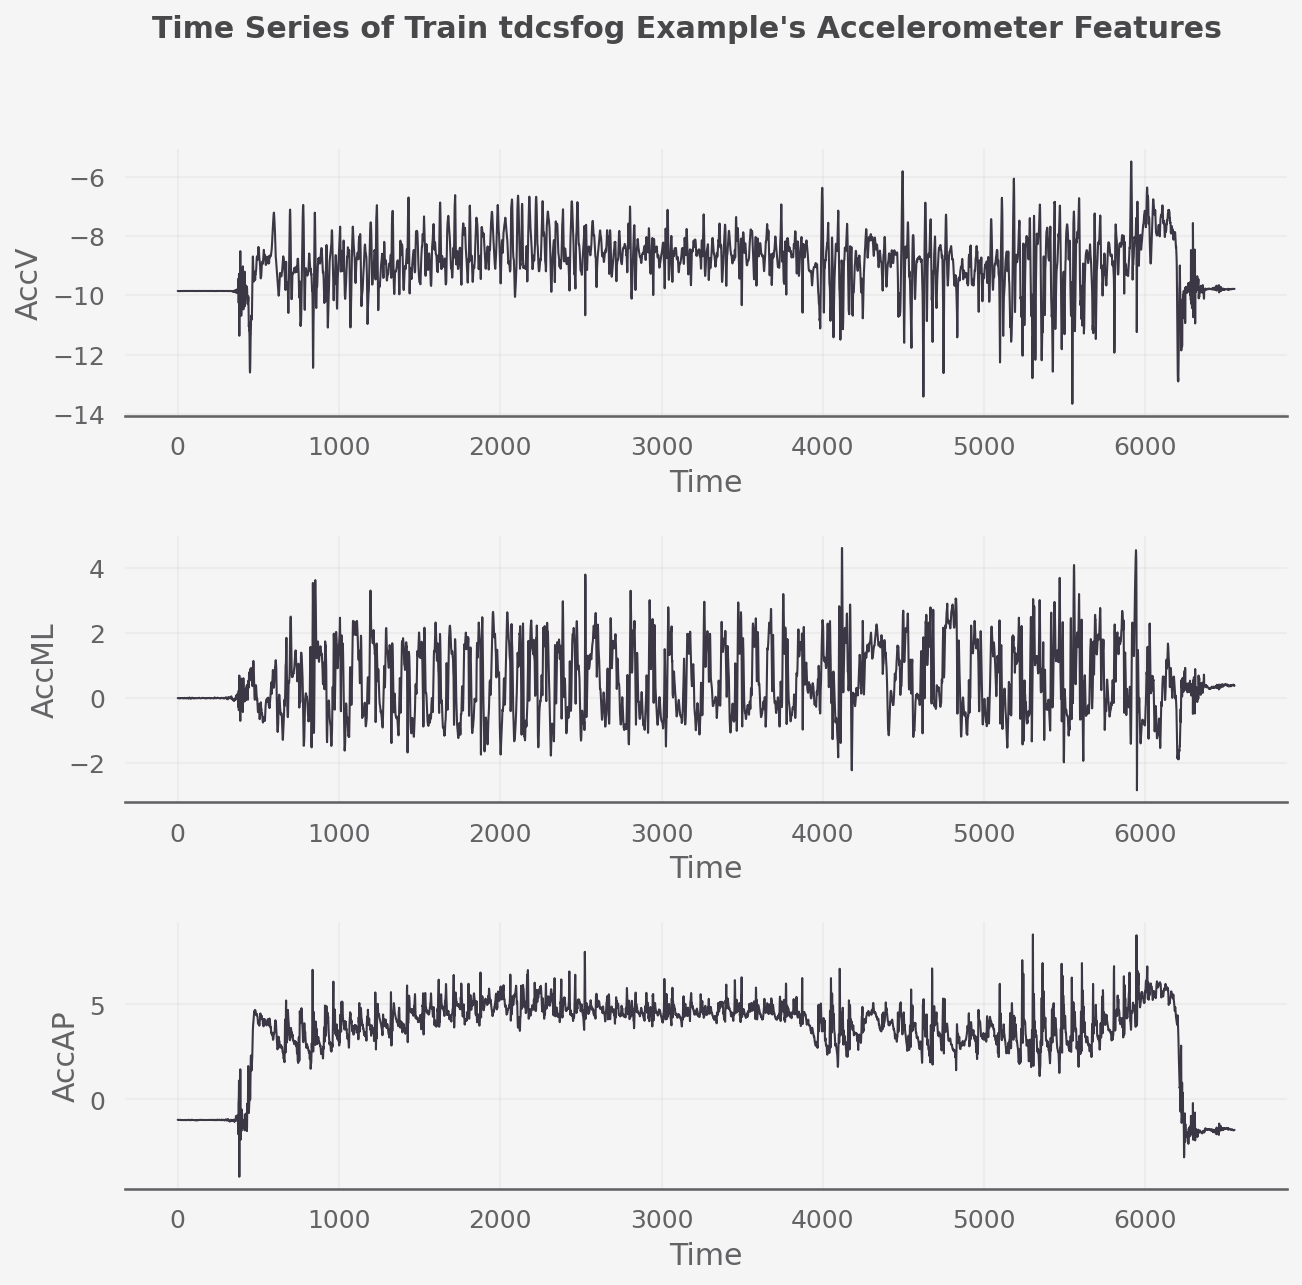

In [13]:
plot_time_series(train_tdcsfog_example, dataframe_name='train tdcsfog example', savefig=CFG.SAVEFIG)

## Train defog

In [19]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/defog"))
train_defog_example = pd.read_csv(f"{CFG.TRAIN_PATH}/defog/{example}")

print(f"\t{gld}Shape of defog example dataframe \t --> \t {red}{train_defog_example.shape}{res}")
display(stylize_simple(train_defog_example.head(5), "train defog example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_defog_example, dataset_name='train defog example'))

	Shape of defog example dataframe 	 --> 	 (220032, 9)


,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task
0,0,-0.971499,-0.080511,-0.099983,0,0,0,False,False
1,1,-0.963269,-0.077254,-0.105992,0,0,0,False,False
2,2,-0.952409,-0.068944,-0.112529,0,0,0,False,False
3,3,-0.958002,-0.058759,-0.114167,0,0,0,False,False
4,4,-0.964255,-0.051270,-0.119980,0,0,0,False,False


,count,mean,std,min,25%,50%,75%,max,NaN count
Time,220032,110015.500,63517.912,0.000,55007.750,110015.500,165023.250,220031.000,0.000
AccV,220032,-0.980,0.109,-5.652,-1.011,-0.992,-0.954,0.713,0.000
AccML,220032,0.054,0.109,-1.532,-0.004,0.053,0.108,1.514,0.000
AccAP,220032,0.050,0.209,-1.519,-0.058,0.024,0.097,0.864,0.000
StartHesitation,220032,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Turn,220032,0.001,0.027,0.000,0.000,0.000,0.000,1.000,0.000
Walking,220032,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### Time Series Plots

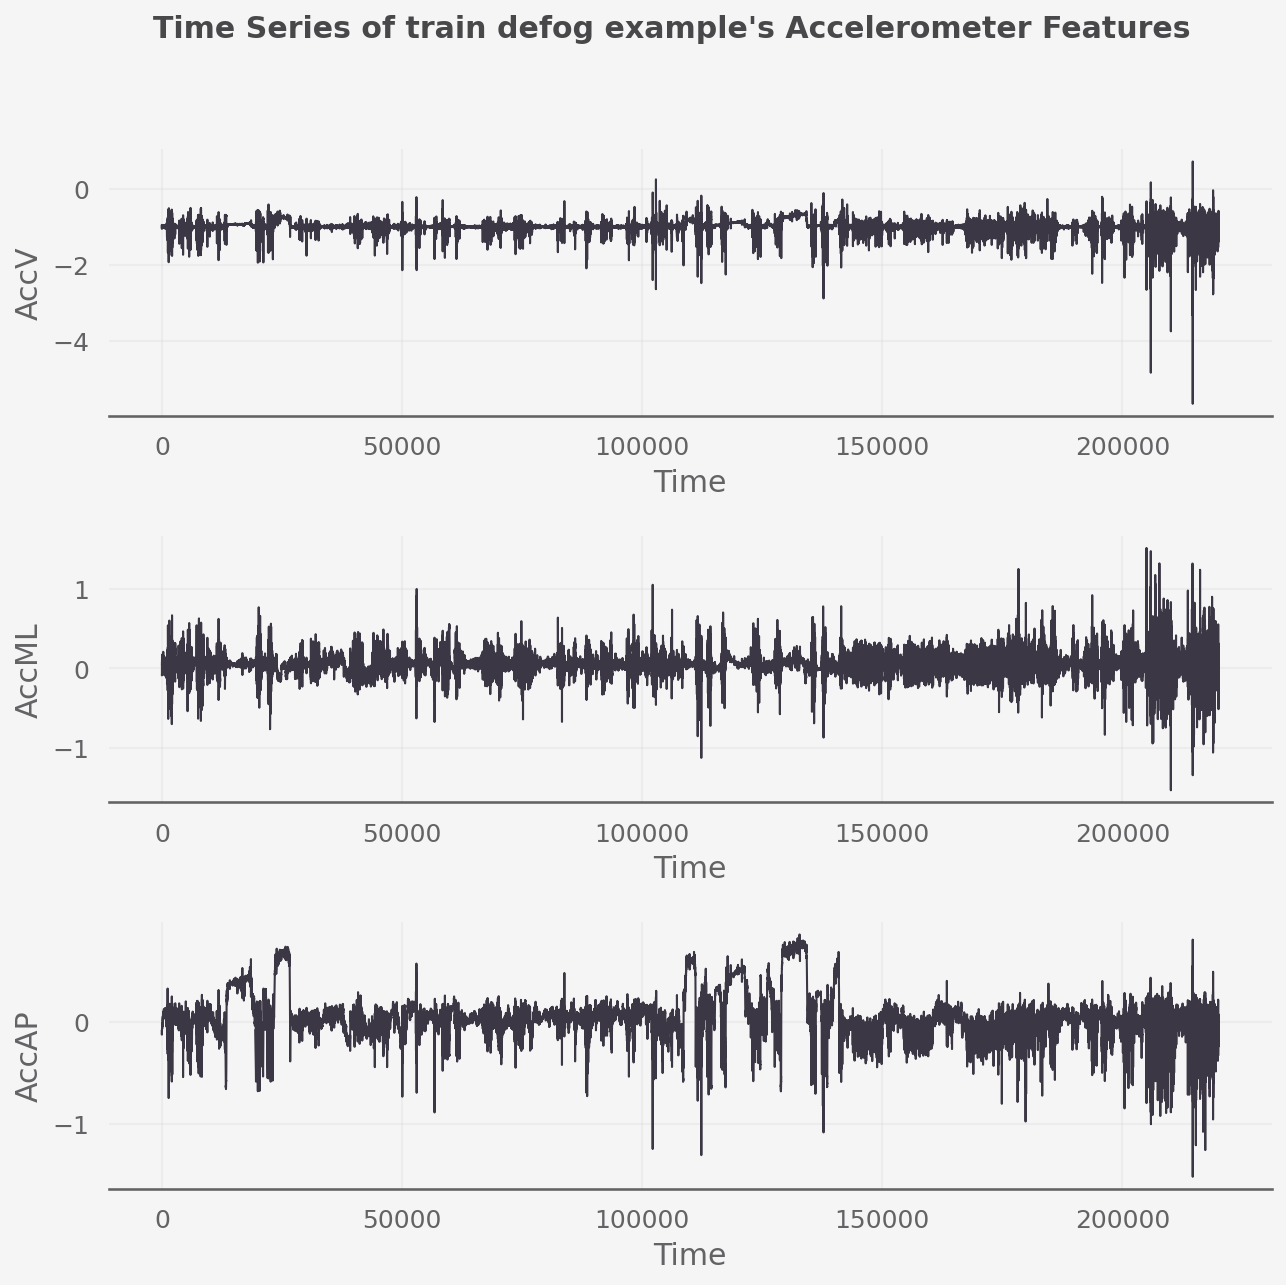

In [20]:
plot_time_series(train_defog_example, dataframe_name='train defog example', savefig=CFG.SAVEFIG)

## Train notype

In [16]:
example = choice(os.listdir(f"{CFG.TRAIN_PATH}/notype"))
train_notype_example = pd.read_csv(f"{CFG.TRAIN_PATH}/notype/{example}")

print(f"\t{gld}Shape of notype example dataframe \t --> \t {red}{train_notype_example.shape}{res}")
display(stylize_simple(train_notype_example.head(5), "train notype example dataframe, top 5 rows (hover to magnify)"))
display(stylize_describe(train_notype_example, dataset_name='train notype example'))

	Shape of notype example dataframe 	 --> 	 (244020, 7)


,Time,AccV,AccML,AccAP,Event,Valid,Task
0,0,-0.915379,-0.082634,-0.341817,0,False,False
1,1,-0.909782,-0.082114,-0.343441,0,False,False
2,2,-0.908224,-0.079903,-0.340578,0,False,False
3,3,-0.908203,-0.080036,-0.339429,0,False,False
4,4,-0.910027,-0.080956,-0.338876,0,False,False


,count,mean,std,min,25%,50%,75%,max,NaN count
Time,244020,122009.500,70442.651,0.000,61004.750,122009.500,183014.250,244019.000,0.000
AccV,244020,-0.908,0.054,-2.482,-0.931,-0.907,-0.883,-0.273,0.000
AccML,244020,-0.089,0.095,-0.838,-0.160,-0.077,-0.024,0.785,0.000
AccAP,244020,-0.096,0.339,-1.019,-0.375,-0.298,0.307,0.519,0.000
Event,244020,0.002,0.041,0.000,0.000,0.000,0.000,1.000,0.000


### Time Series Plots

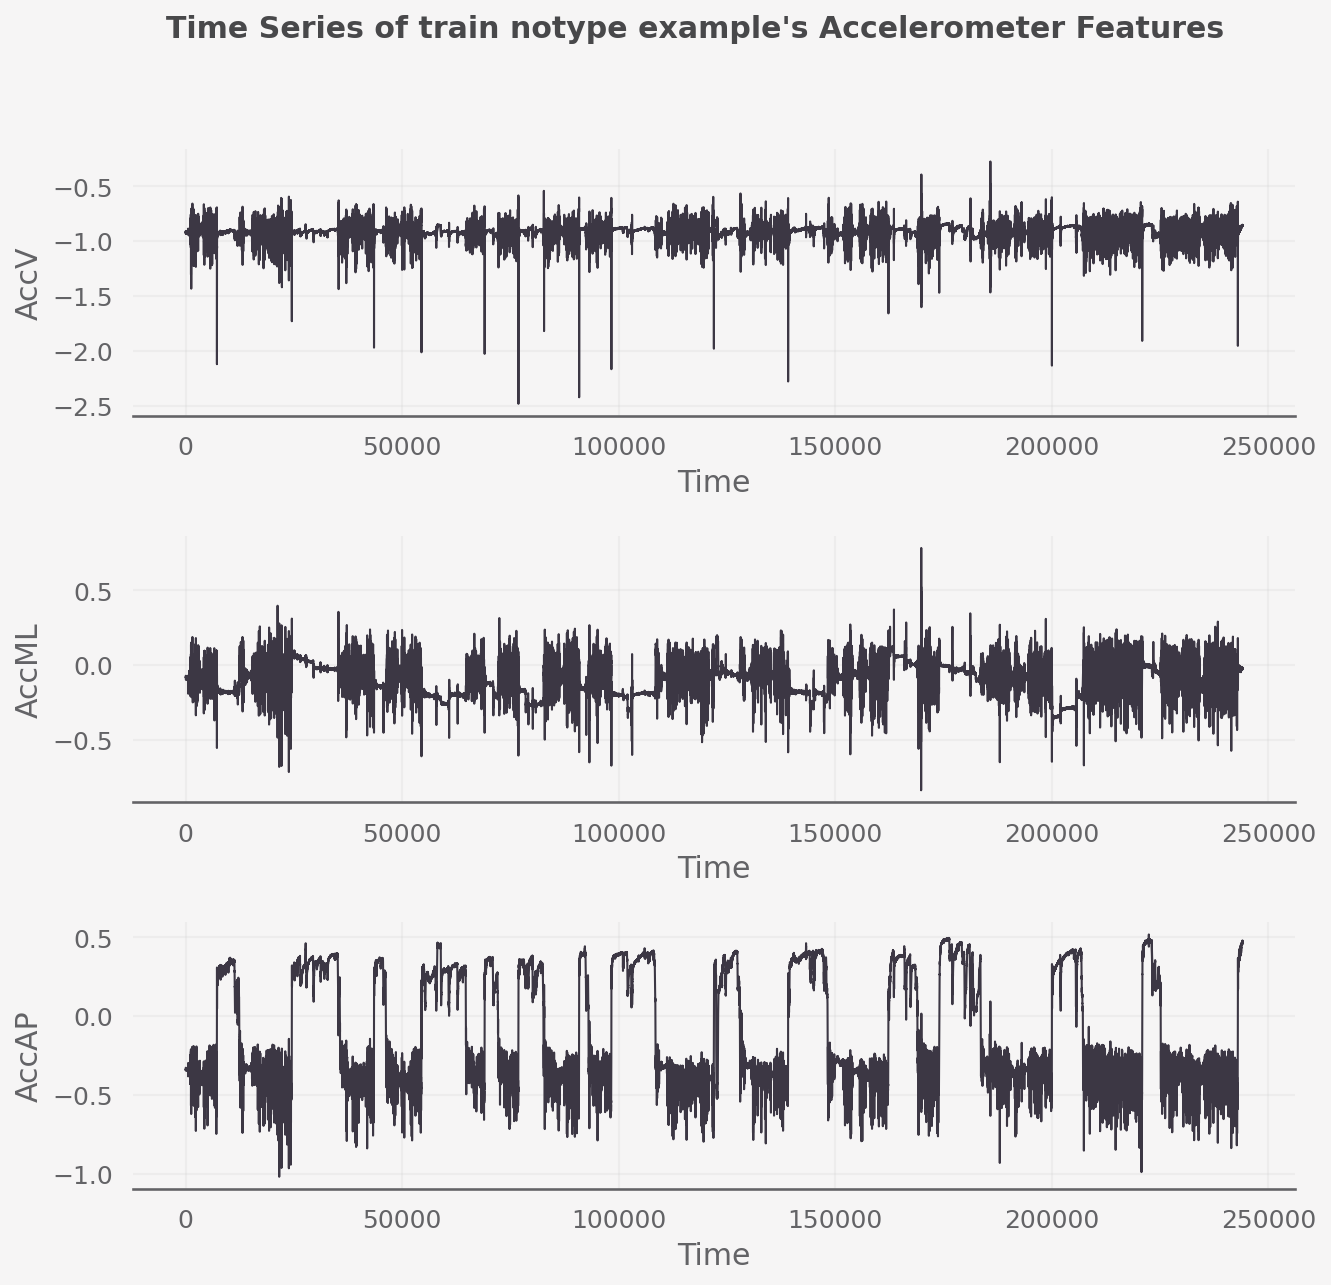

In [17]:
plot_time_series(train_notype_example, dataframe_name='train notype example', savefig=CFG.SAVEFIG)

## Test Data Exploration

In [11]:
print(
    f'\t{gld}Number of files in "test/defog" \t--> \t {red}{len(os.listdir(f"{CFG.TEST_PATH}/defog"))}{res}'
)
print(
    f'\t{gld}Number of files in "test/tdcsfog"\t--> \t {red}{len(os.listdir(f"{CFG.TEST_PATH}/tdcsfog"))}{res}'
)

	Number of files in "test/defog" 	--> 	 1
	Number of files in "test/tdcsfog"	--> 	 1


In [245]:
test_tdcsfog = pd.read_csv(f'{CFG.TEST_PATH}/tdcsfog/003f117e14.csv')
print(f'\t{gld}Shape of test tdcsfog dataframe \t --> \t {red}{test_tdcsfog.shape}')
display(stylize_simple(test_tdcsfog.head(5), 'test tdcsfog dataframe, top 5 rows (hover to magnify)'))
display(stylize_describe(test_tdcsfog, dataset_name='test tdcsfog'))

	Shape of test tdcsfog dataframe 	 --> 	 (4682, 4)


,Time,AccV,AccML,AccAP
0,0,-9.533939,0.566322,-1.413525
1,1,-9.536140,0.564137,-1.440621
2,2,-9.529345,0.561765,-1.429332
3,3,-9.531239,0.564227,-1.415490
4,4,-9.540825,0.561854,-1.429471


,count,mean,std,min,25%,50%,75%,max,NaN count
Time,4682,2340.500,1351.721,0.000,1170.250,2340.500,3510.750,4681.000,0.000
AccV,4682,-9.151,1.384,-23.796,-9.538,-9.235,-8.470,-3.916,0.000
AccML,4682,0.754,1.102,-9.097,0.323,0.581,1.368,5.997,0.000
AccAP,4682,2.472,2.240,-7.353,1.967,3.138,3.820,10.281,0.000


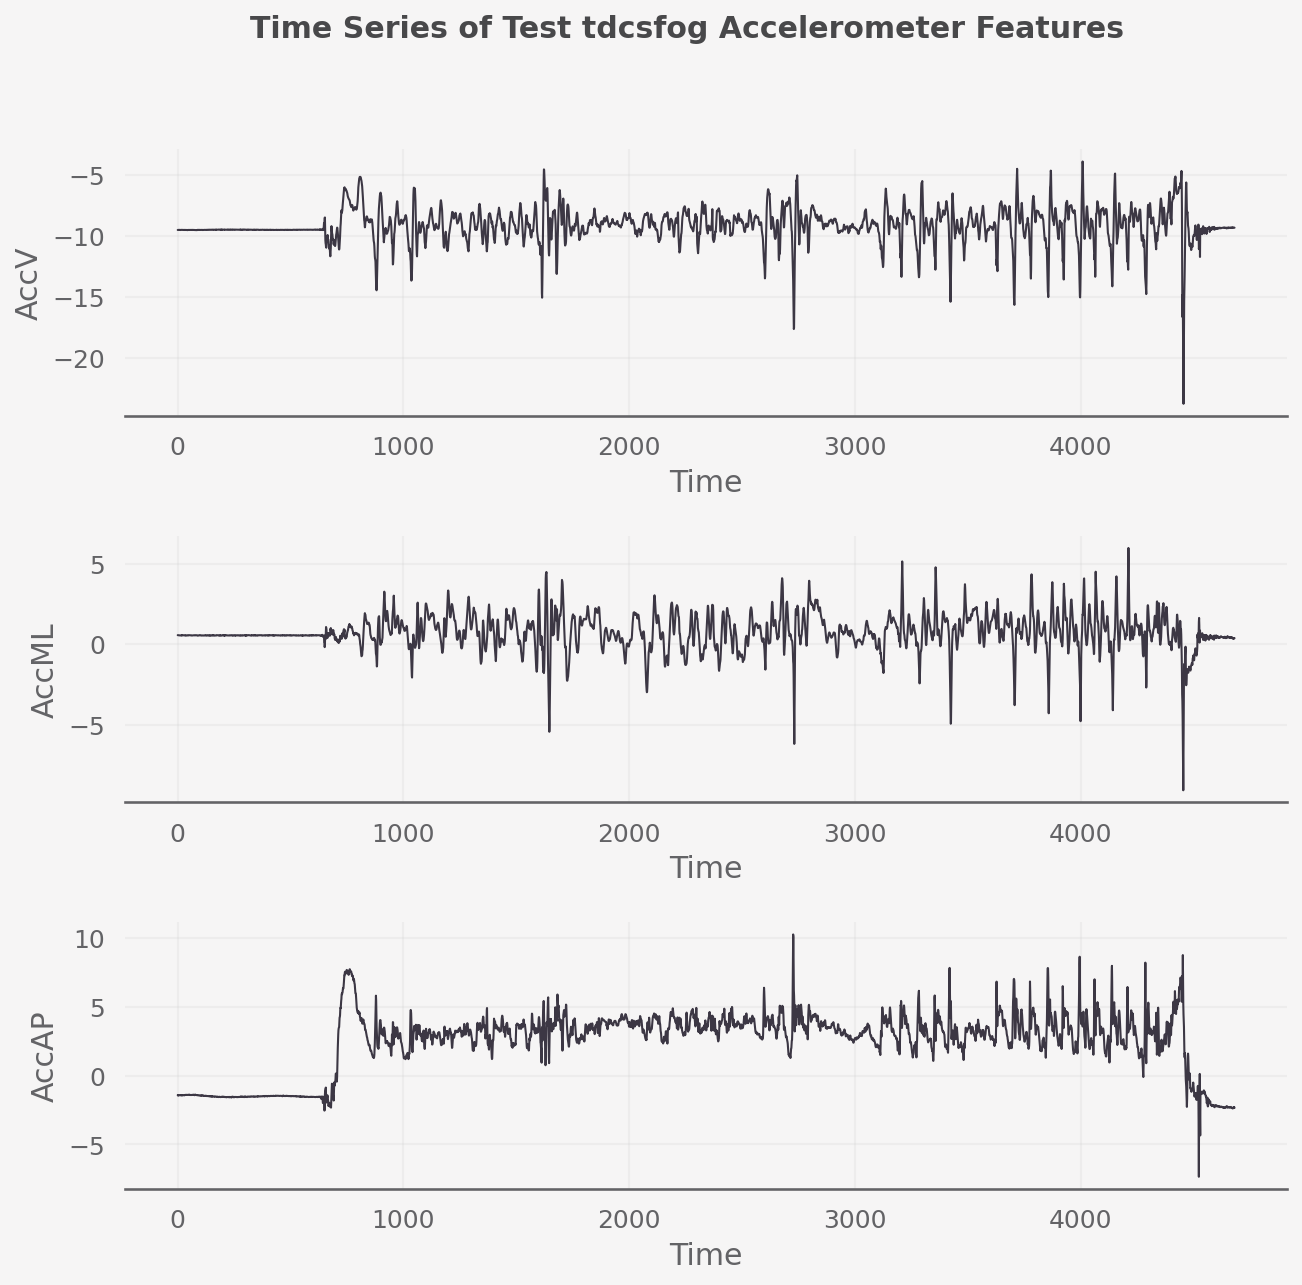

In [246]:
plot_time_series(test_tdcsfog, dataframe_name='test tdcsfog', savefig=CFG.SAVEFIG)

## Test defog

In [233]:
test_defog = pd.read_csv(f'{CFG.TEST_PATH}/defog/02ab235146.csv')
print(f'\t{gld}Shape of test defog dataframe \t --> \t {red}{test_defog.shape}')
display(stylize_simple(test_defog.head(5), 'test defog dataframe, top 5 rows (hover to magnify)'))
display(stylize_describe(test_defog, dataset_name='test defog'))

	Shape of test defog dataframe 	 --> 	 (281688, 4)


,Time,AccV,AccML,AccAP
0,0,-0.914652,-0.300851,0.298156
1,1,-0.914367,-0.301572,0.298325
2,2,-0.779540,-0.343197,0.275690
3,3,-0.993162,-0.270281,0.315775
4,4,-0.948767,-0.307849,0.297191


,count,mean,std,min,25%,50%,75%,max,NaN count
Time,281688,140843.500,81316.466,0.000,70421.750,140843.500,211265.250,281687.000,0.000
AccV,281688,-0.942,0.072,-2.417,-0.982,-0.953,-0.899,0.537,0.000
AccML,281688,-0.040,0.146,-1.084,-0.208,0.005,0.069,0.739,0.000
AccAP,281688,-0.018,0.272,-1.090,-0.219,-0.088,0.243,1.037,0.000


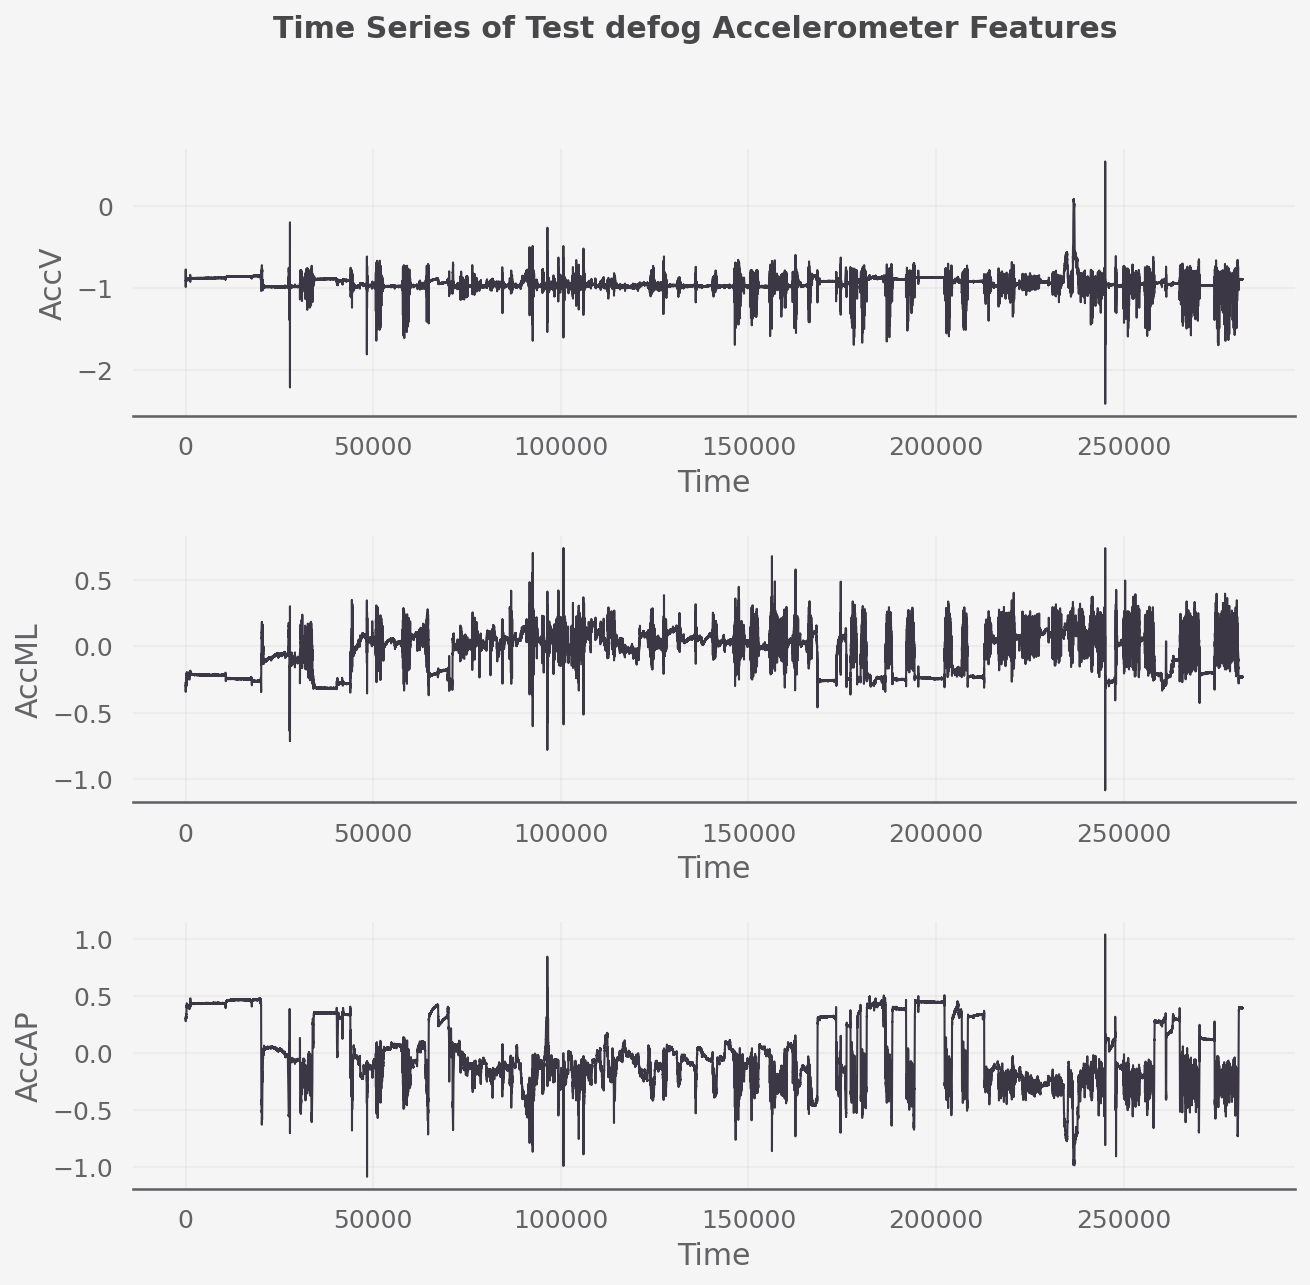

In [234]:
plot_time_series(test_defog, dataframe_name='test defog', savefig=CFG.SAVEFIG)

## Unlabeled Data Exploration

In [16]:
print(
    f'\t{gld}Number of files in "unlabeled"   \t--> \t {red}{len(os.listdir(f"{CFG.UNLABELED_PATH}"))}{res}'
)
example = choice(os.listdir(f"{CFG.UNLABELED_PATH}"))
unlabeled_example = pd.read_parquet(f'{CFG.UNLABELED_PATH}/{example}')
print(f'\t{gld}Shape of unlabeled example\t\t --> \t {red}{unlabeled_example.shape}{res}')
display(stylize_simple(unlabeled_example.head(5), 'unlabeled example top 5 rows (hover to magnify)'))
display(stylize_describe(unlabeled_example, dataset_name='unlabeled example'))

	Number of files in "unlabeled"   	--> 	 65
	Shape of unlabeled example		 --> 	 (60479670, 4)


### Time Series Plots

NameError: name 'unlabeled_example' is not defined

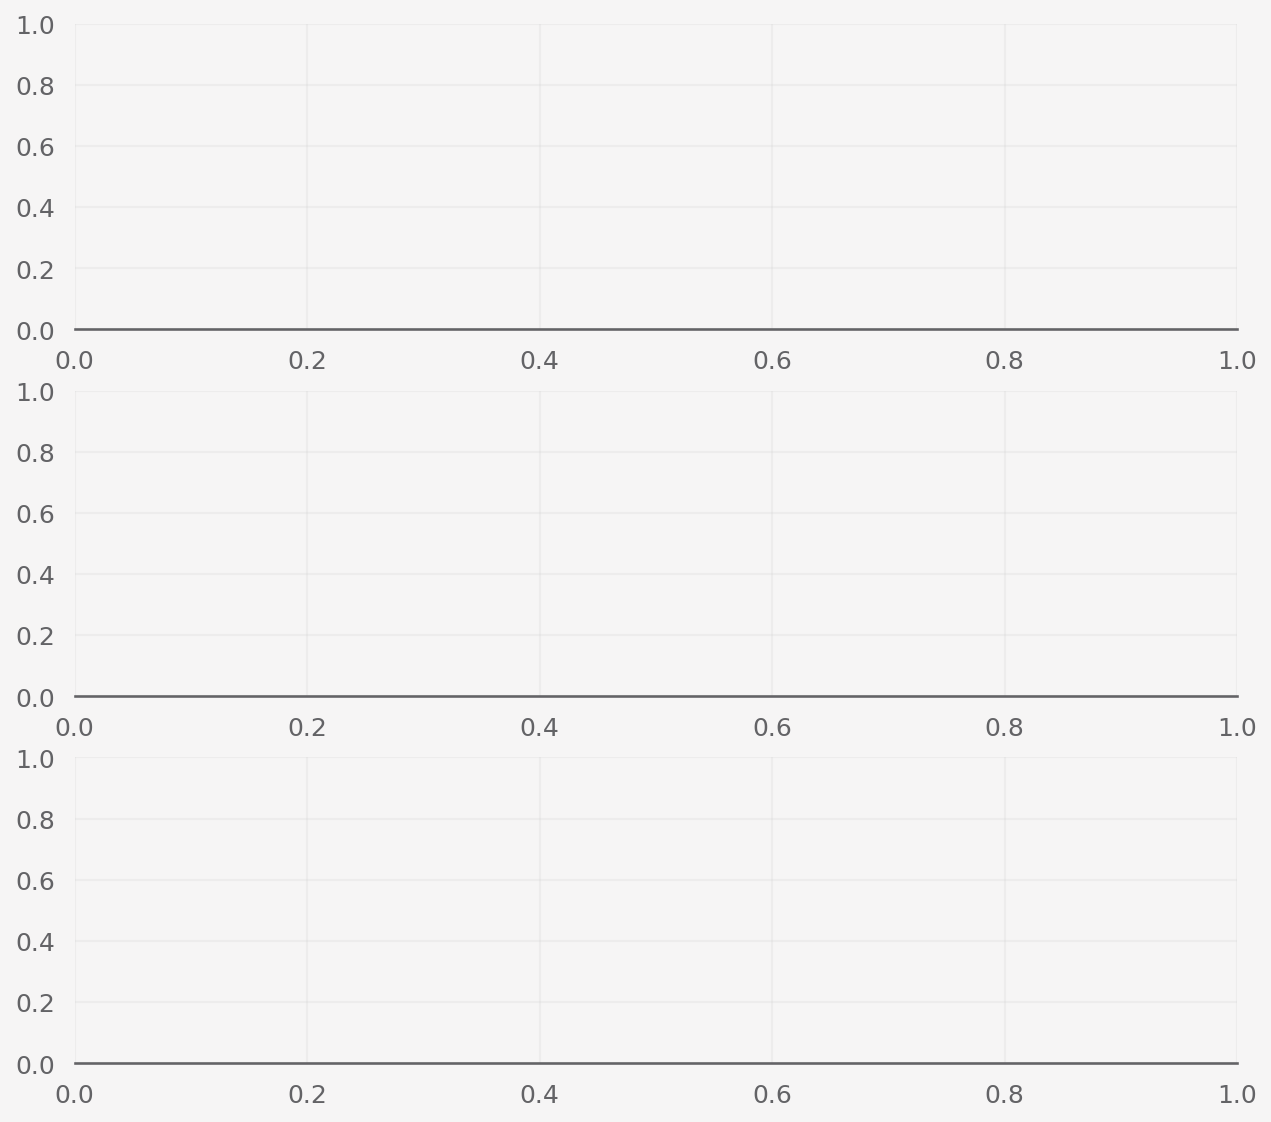

In [226]:
# Don't run this cell if you don't have at least 20Gb of RAM and 10mins to spare
plot_time_series(unlabeled_example, dataframe_name='unlabeled example', savefig=CFG.SAVEFIG)